In [1]:
import sys
import os

import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [4]:
# Get the absolute path of the current file
try:
    # Works in .py scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter
    current_dir = os.getcwd()

# Go up N levels (here N=2, but you can adjust)
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))

# Add the project root to sys.path if not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [5]:
# specify parameters for gradient descent
delta_J_threshold = 0.000001
learning_rate = 0.001

In [7]:
in_file_name = "../../../data/home_price.csv"
data_in_df = pd.read_csv(in_file_name)
data_in_df.head()

,size,number of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [8]:
# x_name = ['size', 'number of bedrooms']
x_name = ['size']
y_name = ['price']

variable_to_plot = ['size']

Text(0, 0.5, "['price']")

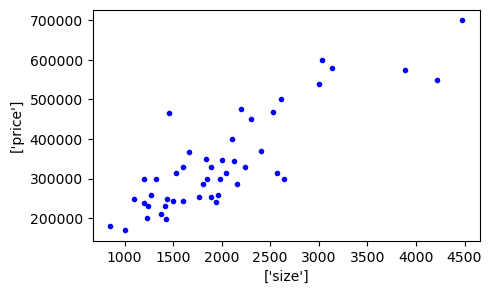

In [9]:
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(data_in_df[variable_to_plot], data_in_df[y_name], marker='.', color='blue')
ax.set_xlabel(variable_to_plot)
ax.set_ylabel(y_name)

In [56]:
# normalize variables to make them have similar scale
standard_scaler_obj = StandardScaler()
standard_scaler_obj.fit(data_in_df[x_name + y_name])

mean_needed_df = pd.Series(standard_scaler_obj.mean_, index=x_name + y_name)
scale_needed_df = pd.Series(standard_scaler_obj.scale_, index=x_name + y_name)

data_normalized_df = pd.DataFrame(standard_scaler_obj.transform(data_in_df[x_name+y_name]), \
                                  index=data_in_df.index, \
                                  columns=x_name + y_name)

In [57]:
# get information on x (single variable) and y
X = data_normalized_df[x_name]
y = data_normalized_df[y_name]

# augment X0
X = sm.add_constant(X)

number_of_variables = X.shape[1]

 # including X0
initial_theta = np.zeros((number_of_variables, 1))

In [58]:
delta_J_threshold
initial_theta
learning_rate
X

,const,size
0,1.0,0.131415
1,1.0,-0.509641
2,1.0,0.507909
3,1.0,-0.743677
4,1.0,1.271071
5,1.0,-0.019945
6,1.0,-0.593589
7,1.0,-0.729686
8,1.0,-0.789467
9,1.0,-0.644466


In [105]:
# gradient descent
obj_MLR = MLR(delta_J_threshold=delta_J_threshold,
                                               initial_theta=initial_theta,
                                               learning_rate=learning_rate)

obj_MLR.fit(X=X, y=y)
optimal_theta = obj_MLR.optimal_theta
J = obj_MLR.J

KeyboardInterrupt: 